In [29]:
import os
print(os.getcwd()) 

C:\Users\LENOVO


In [2]:
import os

# List all files and directories in a specific folder
folder_path = r'C:\Users\LENOVO\Desktop\dataset\fruit_recognition'  # Change this to your folder path
files = os.listdir(folder_path)

print(files)  # Prints list of files and directories in the folder

['test', 'train', 'validation']


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [12]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
    r'C:\Users\LENOVO\Desktop\dataset\fruit_recognition\train',
    labels = 'inferred',
    label_mode = 'categorical',
    class_names = None,
    color_mode = 'rgb',
    batch_size = 32,
    image_size = (64,64),
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 3115 files belonging to 36 classes.


In [13]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    r'C:\Users\LENOVO\Desktop\dataset\fruit_recognition\validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 351 files belonging to 36 classes.


In [14]:
for images, labels in train_set.take(1):
    print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")

Images shape: (32, 64, 64, 3), Labels shape: (32, 36)


In [15]:
cnn = tf.keras.models.Sequential()

In [16]:
cnn.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 3)))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(256, (3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(512, (3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [17]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=512, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))  # Prevents overfitting
cnn.add(tf.keras.layers.Dense(units=36, activation='softmax'))  # 36 classes

In [18]:
cnn.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = cnn.fit(x=train_set, validation_data=validation_set, epochs=30)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 302ms/step - accuracy: 0.0393 - loss: 10.1891 - val_accuracy: 0.1681 - val_loss: 2.9830
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 226ms/step - accuracy: 0.1323 - loss: 3.0735 - val_accuracy: 0.2365 - val_loss: 2.5395
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 224ms/step - accuracy: 0.1895 - loss: 2.8178 - val_accuracy: 0.3732 - val_loss: 2.1379
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.2302 - loss: 2.5877 - val_accuracy: 0.4558 - val_loss: 1.8087
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 236ms/step - accuracy: 0.3065 - loss: 2.3173 - val_accuracy: 0.5726 - val_loss: 1.5783
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 22s 226ms/step - accuracy: 0.3550 - loss: 2.2133 - val_accuracy: 0.5840 - val_loss: 1.3778
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 24s 237ms/step - accuracy: 0.3830 - loss: 2.0536 - val_accuracy: 0.6154 - val_loss: 1.2918
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 26s 260ms/step - accuracy: 0.4264 - loss: 1.9208 - val_acc

In [23]:
cnn.save(r'C:\Users\LENOVO\Desktop\fruit_recognition_project/trained_model.keras')

In [24]:
history.history

{'accuracy': [0.058105938136577606,
  0.146388441324234,
  0.21059389412403107,
  0.25939005613327026,
  0.3158908486366272,
  0.37078651785850525,
  0.385553777217865,
  0.4459069073200226,
  0.48571428656578064,
  0.5264847278594971,
  0.5707865357398987,
  0.6003210544586182,
  0.6513643860816956,
  0.6908507347106934,
  0.6963081955909729,
  0.7287319302558899,
  0.7752808928489685,
  0.80128413438797,
  0.7983948588371277,
  0.8105939030647278,
  0.8452648520469666,
  0.873515248298645,
  0.899839460849762,
  0.8796147704124451,
  0.8478330373764038,
  0.8831460475921631,
  0.8886035084724426,
  0.8898876309394836,
  0.8924558758735657,
  0.8982343673706055],
 'loss': [5.116323471069336,
  3.0013575553894043,
  2.723214626312256,
  2.4789936542510986,
  2.2797296047210693,
  2.1364481449127197,
  2.0380592346191406,
  1.866308331489563,
  1.716526985168457,
  1.5637922286987305,
  1.4063669443130493,
  1.2803001403808594,
  1.1412243843078613,
  1.001297950744629,
  1.006692767143

In [25]:
## recording history
import json
with open('training_hist.json', 'w') as f:
  json.dump(history.history, f)

In [26]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [27]:
print("Validation Set acuuracy: {}%".format(history.history['val_accuracy'][-1]*100))

Validation Set acuuracy: 93.4472918510437%


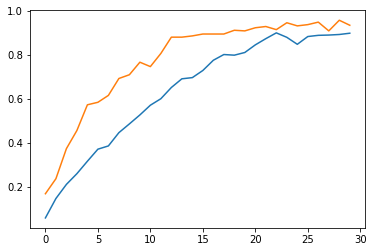

In [28]:
epocha = range(len(history.history['loss']))
plt.plot(epocha, history.history['accuracy'], label='Training Accuracy')
plt.plot(epocha, history.history['val_accuracy'], label='Validation Accuracy')